In [1]:
from matplotlib.pyplot import *
from matplotlib import pyplot
import math
from scipy.optimize import *

In [2]:
pyplot.rcParams["figure.figsize"] = (20,10)

In [3]:
AcuityNumber = 10

In [4]:
class Section:
    
    def __init__(self,mode):
        self.mode = mode
        self.A_right = [0]*AcuityNumber
        self.A_total = [0]*AcuityNumber
        self.A_percent = [0]*AcuityNumber
        
    def calcul_percent(self):
        for i in range(0,len(self.A_total)):
            self.A_percent[i] = self.A_right[i] / self.A_total[i]

In [5]:
def sigmoid1(x):
    return 1 / (1 + math.exp(-x))

In [6]:
def sigmoid2(x, a, b):
    return 0.875 / (1.0 + np.exp(-a*(x-b))) + 0.125

$$f(x) = \frac {L}{1+e^{-k(x-x_0)}}$$

In [7]:
def cur_fit(y_data):
    popt, pcov = curve_fit(sigmoid2, range(0,len(y_data)), y_data)
    tpl, = plot(range(0,len(y_data)), sigmoid2(range(0,len(y_data)), *popt))
    print(popt)
    return tpl,popt

In [8]:
def percent_cal(k,x0,y):
    loge1dym1 = math.log((1/y)-1)
    return (loge1dym1)/(-k) + x0

In [9]:
path_name = "./data/"
file_name = "AcuityLog_2019_06_13_03_07_35.txt"

In [10]:
file = open(path_name+file_name,"r")
lines = file.readlines()

In [11]:
sections = []
temp_section = None
for line in lines:
    strings = line.split()
    if(len(strings) > 3):
        if(strings[1] == "start"):
            if(temp_section != None):
                sections.append(temp_section)
            temp_section = Section(strings[4])
        else:
            try:
                AZ = int(strings[3])
            except:
                AZ = -1
            if(AZ>=0):
                temp_section.A_total[AZ] += 1
                if(strings[4] == "True"):
                    temp_section.A_right[AZ] += 1
if(temp_section != None):
    sections.append(temp_section)

for section in sections:
    section.calcul_percent()

for(section in sections):
    

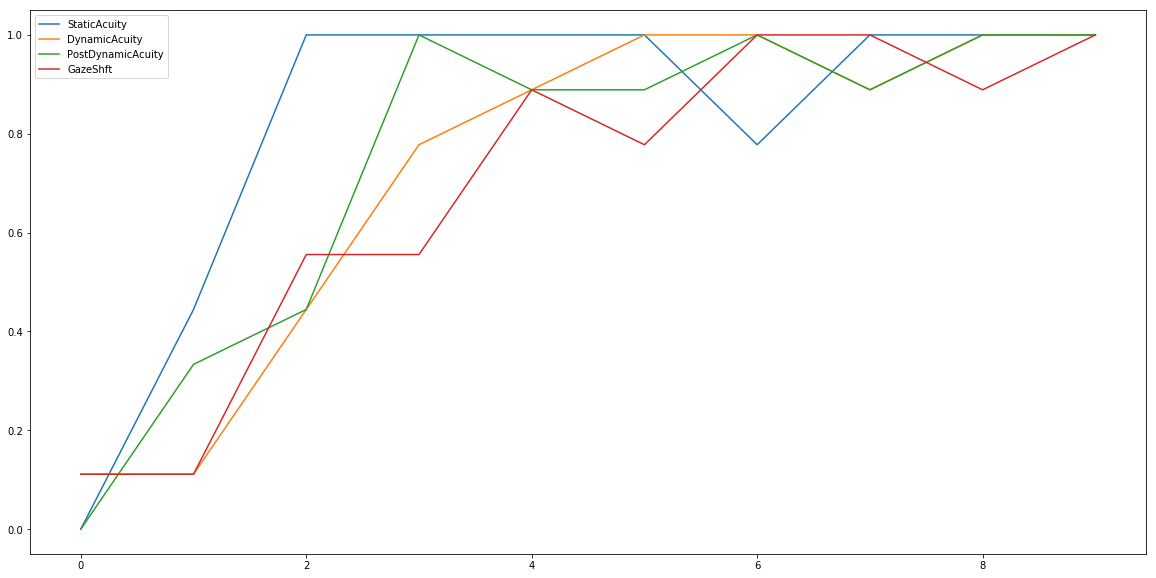

In [12]:
i = -1
legends = []
plines = []
for section in sections:
    i += 1
    tpl, = plot(range(0,AcuityNumber),sections[i].A_percent)
    plines.append(tpl)
    legends.append(sections[i].mode)
legends[-1] = "GazeShft"
pyplot.legend(legends)
#plines[0].remove()

StaticAcuity
[18.47608935  1.02994816]
DynamicAcuity
[1.80268588 2.41230434]
PostDynamicAcuity
[2.18511397 2.09043459]
PostDynamicAcuity
[1.03498239 2.74935661]


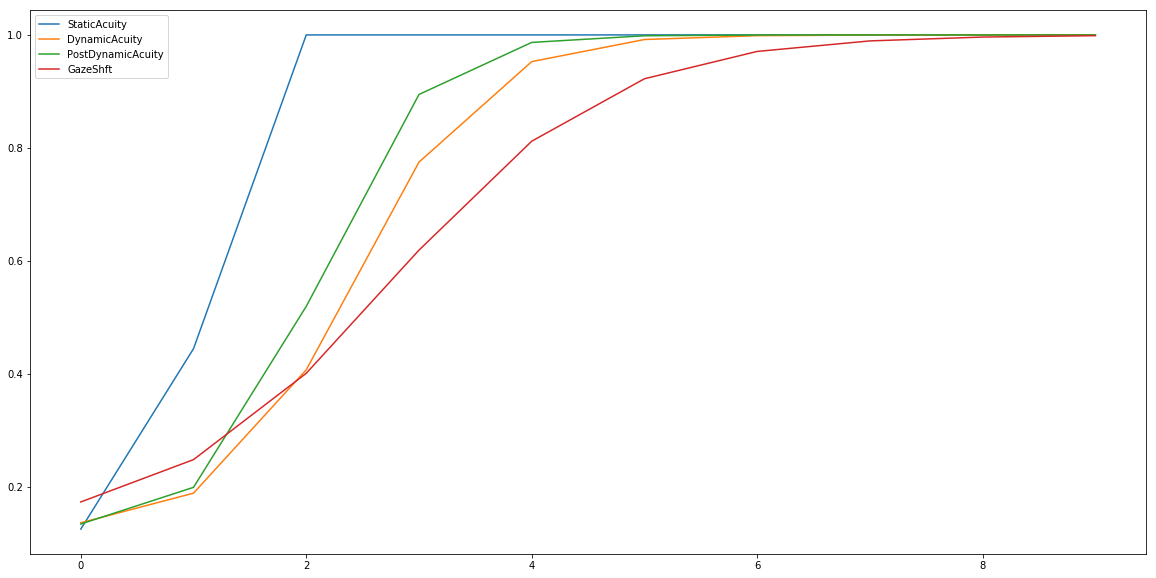

In [13]:
legends2 = []
plines = []
cur_popts = []
for section in sections:
    print(section.mode)
    legends2.append(section.mode)
    tlp,popt = cur_fit(section.A_percent)
    plines.append(tlp)
    cur_popts.append(popt) 
legends2[-1] = "GazeShft"
pyplot.legend(legends2)
#plines[0].remove()

In [14]:
Precise = 0.1

In [15]:
def draw_compare(index):
    tpl, = plot(range(0,AcuityNumber),sections[index].A_percent,".")
    cur_tpl, = plot(np.arange(0,len(sections[index].A_percent),Precise), sigmoid2(np.arange(0,len(sections[index].A_percent),Precise), *cur_popts[index]))
    pyplot.legend([sections[index].mode])

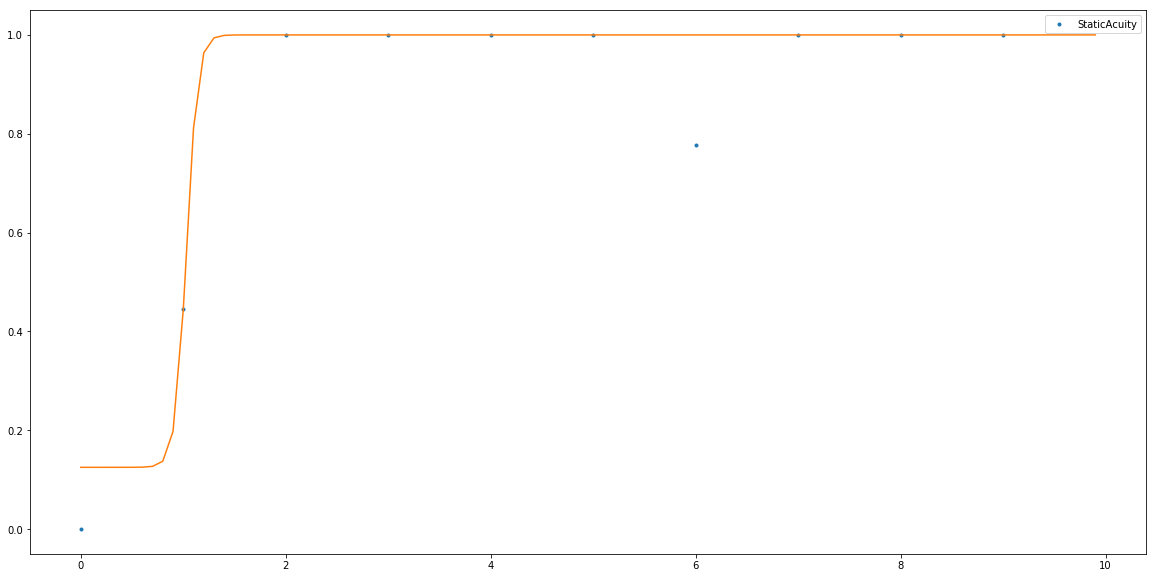

In [16]:
draw_compare(0)

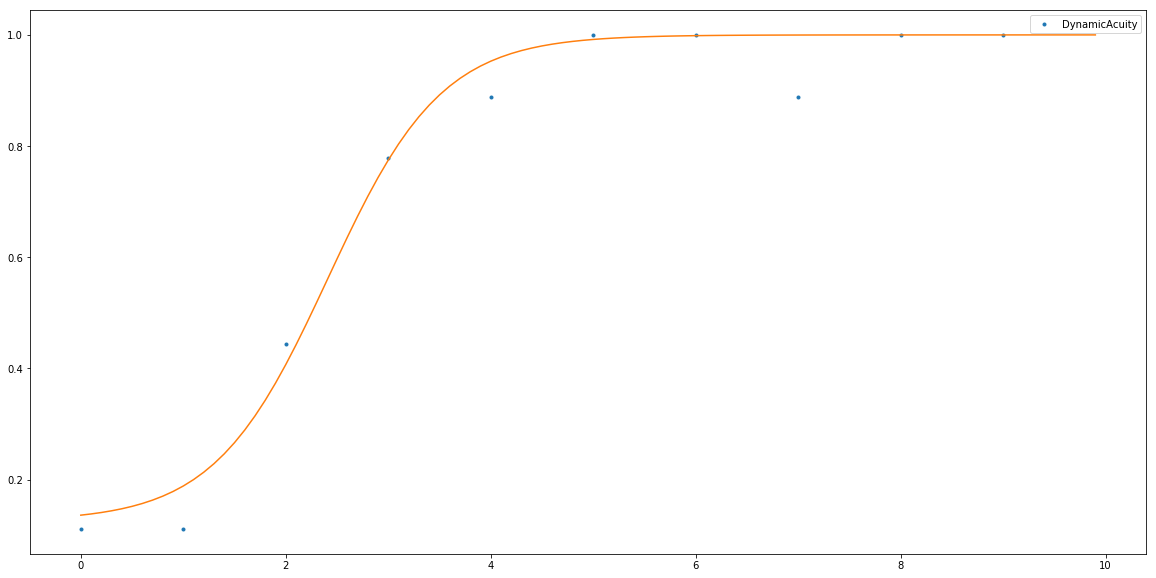

In [17]:
draw_compare(1)

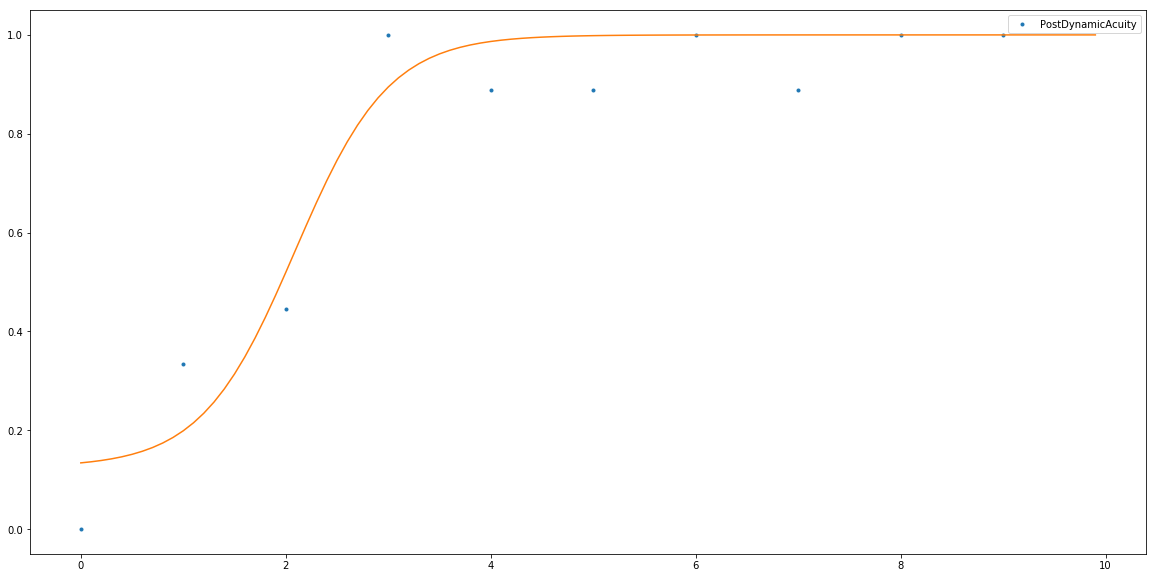

In [18]:
draw_compare(2)

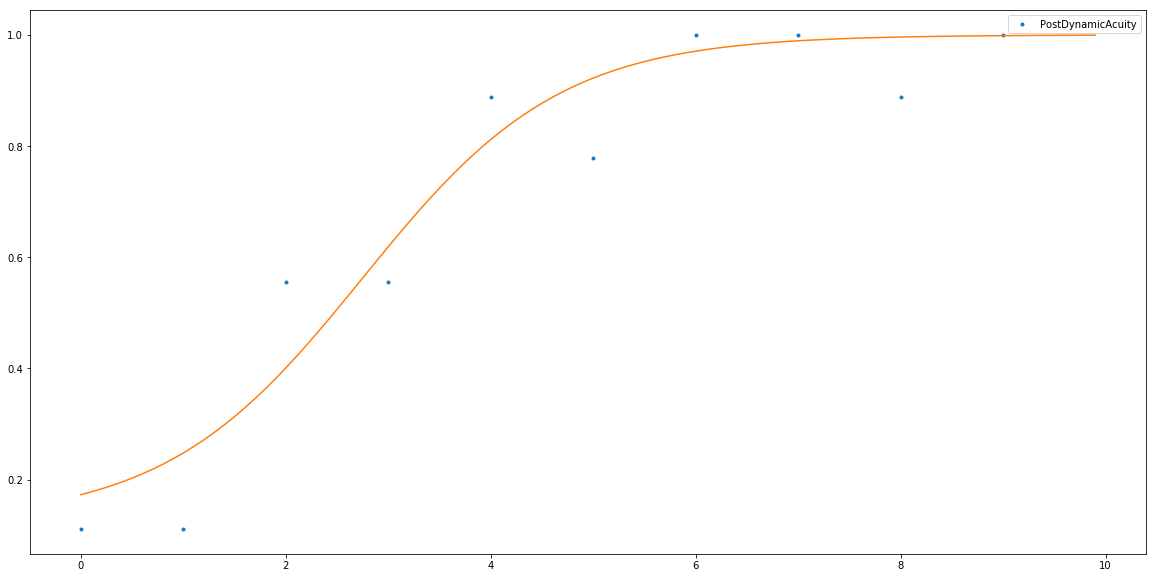

In [19]:
draw_compare(3)

In [20]:
y = 0.8
print(percent_cal(1.27684543, 0.88405065 ,y))
print(percent_cal(2.44631207, 0.69156386 ,y))
print(percent_cal(3.20700723, 1.17558442 ,y))
print(percent_cal(0.75669271, 1.70771435 ,y))

1.9697688806866154
1.258251315014638
1.6078548396460108
3.539758378969026
